In [1]:
import os
import SimpleITK as sitk
# ! pip install SimpleITK==1.2.4
import matplotlib.pyplot as plt
import numpy as np
    
from ipywidgets import interact, fixed
from IPython.display import display
%matplotlib inline

### Helper functions (display / intensity)

In [2]:
def wl_to_lh(window, level):
    low = level - window/2
    high = level + window/2
    return low,high

def display_image(img, x=None, y=None, z=None, window=None, level=None):
    # Convert SimpleITK image to NumPy array
    img_array = sitk.GetArrayFromImage(img)
    
    # Get image dimensions in millimetres
    size = img.GetSize()
    spacing = img.GetSpacing()
    width  = size[0] * spacing[0]
    height = size[1] * spacing[1]
    depth  = size[2] * spacing[2]
    
    if x is None:
        x = np.floor(size[0]/2).astype(int)
    if y is None:
        y = np.floor(size[1]/2).astype(int)
    if z is None:
        z = np.floor(size[2]/2).astype(int)
    
    if window is None:
        window = np.max(img_array) - np.min(img_array)
    
    if level is None:
        level = window / 2 + np.min(img_array)
    
    low,high = wl_to_lh(window,level)

    # Display the orthogonal slices
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

    ax1.imshow(img_array[z,:,:], cmap='gray', clim=(low, high), extent=(0, width, height, 0))
    ax2.imshow(img_array[:,y,:], origin='lower', cmap='gray', clim=(low, high), extent=(0, width,  0, depth))
    ax3.imshow(img_array[:,:,x], origin='lower', cmap='gray', clim=(low, high), extent=(0, height, 0, depth))

    # Additionally display crosshairs
    ax1.axhline(y * spacing[1], lw=1)
    ax1.axvline(x * spacing[0], lw=1)
    
    ax2.axhline(z * spacing[2], lw=1)
    ax2.axvline(x * spacing[0], lw=1)
    
    ax3.axhline(z * spacing[2], lw=1)
    ax3.axvline(y * spacing[1], lw=1)

    plt.show()
    


def interactive_view(img):
    size = img.GetSize()
    img_array = sitk.GetArrayFromImage(img)
    interact(display_image,img=fixed(img),
             x=(0, size[0] - 1),
             y=(0, size[1] - 1),
             z=(0, size[2] - 1),
             window=(0,np.max(img_array) - np.min(img_array)),
             level=(np.min(img_array),np.max(img_array)))
    
    
def label_overlay(img, seg):
    minmax = sitk.MinimumMaximumImageFilter()
    minmax.Execute(img)
    low, high = minmax.GetMinimum(), minmax.GetMaximum()
    img_norm = (img - low) / (high - low)
    img_uint8 = sitk.Cast(256 * img_norm, sitk.sitkUInt8)
    return sitk.LabelOverlay(img_uint8, seg)

def display_overlay(img, seg, *args, **kwargs):
    display_image(label_overlay(img, seg), *args, **kwargs)

### Test data

In [3]:
aw_test = "/DATA/data_MESA/MESA_FL_Ex5_Nifty/AW/3010007_AW.nii.gz"
img_test = "/DATA/data_MESA/MESA_FL_Ex5_Nifty/IMG/3010007_IMG.nii.gz"
lung_test = "/DATA/data_MESA/MESA_FL_Ex5_Nifty/LUNG/3010007_LUNG.nii.gz"

In [4]:
aw_img = sitk.ReadImage(aw_test)
lung_img = sitk.ReadImage(lung_test)
img = sitk.ReadImage(img_test)

In [ ]:
# get the tree data for this participant


In [86]:
print(img)

Image (0x55fcb0ceba70)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 1
  Modified Time: 3729
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 3708
  UpdateMTime: 3728
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 670]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 670]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 670]
  Spacing: [1, 1, 1]
  Origin: [-1, -1, 1]
  Direction: 
-1 0 0
0 -1 0
0 0 1

  IndexToPointMatrix: 
-1 0 0
0 -1 0
0 0 1

  PointToIndexMatrix: 
-1 0 0
0 -1 0
0 0 1

  Inverse Direction: 
-1 0 0
0 -1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x55fcb34f45d0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
      Reference Count: 1
      Modified Time: 3725
      

In [5]:
print(img.GetSpacing(), img.GetSize())
# each voxel is 

(1.0, 1.0, 1.0) (512, 512, 670)


In [7]:
interactive_view(lung_img)
interactive_view(aw_img)
interactive_view(img)

# z = 0, x= 256, y = 256 on this image appears to be the top of the trachea
# --> can see this by scrolling down z axis from 0--> 670 on aw_img

interactive(children=(IntSlider(value=255, description='x', max=511), IntSlider(value=255, description='y', ma…

interactive(children=(IntSlider(value=255, description='x', max=511), IntSlider(value=255, description='y', ma…

interactive(children=(IntSlider(value=255, description='x', max=511), IntSlider(value=255, description='y', ma…

### Single Slice

In [10]:
img_array =  sitk.GetArrayFromImage(aw_img)
size = img.GetSize()
spacing = img.GetSpacing()

width  = size[0] * spacing[0]
height = size[1] * spacing[1]
depth  = size[2] * spacing[2]

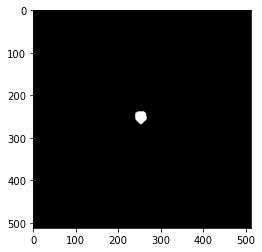

In [13]:
# top down
plt.imshow(img_array[1,:,:], cmap='gray', extent=(0, width, height, 0))

In [16]:
img_array[1,:,:].sum()

162435

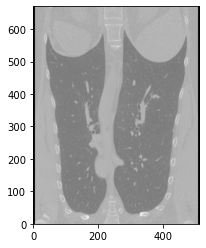

In [90]:
plt.imshow(img_array[:,200,:], origin='lower', cmap='gray', extent=(0, width, 0, depth))

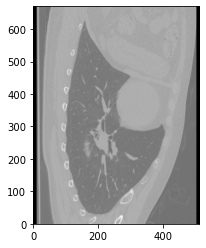

In [91]:
plt.imshow(img_array[:,:,180], origin='lower', cmap='gray', extent=(0, height, 0, depth))

(512, 512, 670)


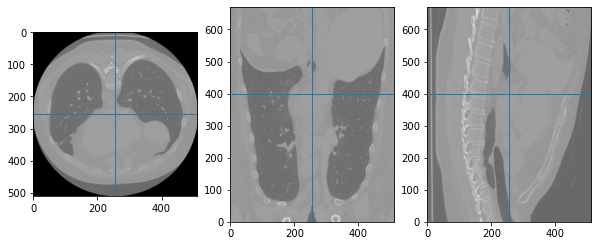

In [92]:
print(img.GetSize())
display_image(img, 256,256,400)

(array([3.7367240e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.9670168e+07, 6.8016010e+06, 1.6811070e+06, 3.6193350e+07,
        5.0472875e+07, 2.1100620e+06, 8.2518100e+05, 3.4147800e+05,
        1.3161000e+05, 4.0967000e+04, 8.1600000e+02, 2.5000000e+01]),
 array([-3024.  , -2777.45, -2530.9 , -2284.35, -2037.8 , -1791.25,
        -1544.7 , -1298.15, -1051.6 ,  -805.05,  -558.5 ,  -311.95,
          -65.4 ,   181.15,   427.7 ,   674.25,   920.8 ,  1167.35,
         1413.9 ,  1660.45,  1907.  ]),
 <BarContainer object of 20 artists>)

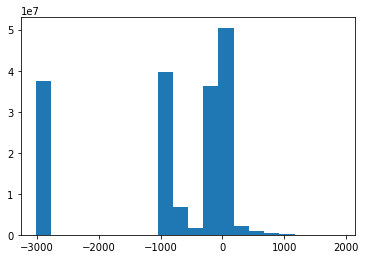

In [93]:
plt.hist(img_array.flatten(), bins=20, density=False)

Thresholding - Surface


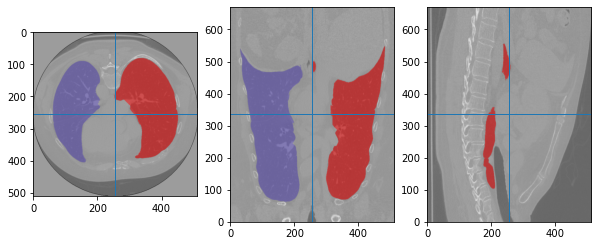

interactive(children=(IntSlider(value=255, description='x', max=511), IntSlider(value=255, description='y', ma…

In [96]:
seg_contour = sitk.LabelContour(img)

print("Thresholding - Surface")
display_image(label_overlay(seg_contour, lung))
interactive_view(seg_contour)

interactive(children=(IntSlider(value=255, description='x', max=511), IntSlider(value=255, description='y', ma…